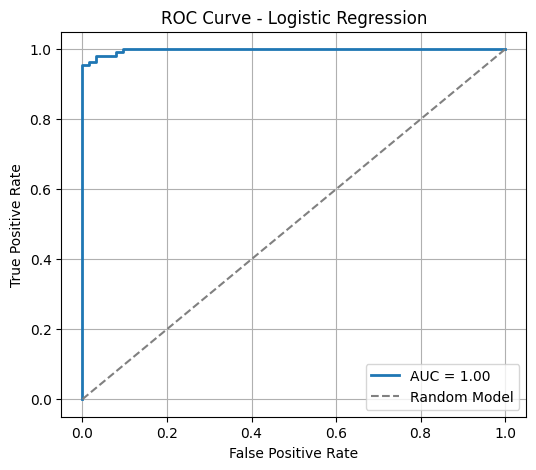

AUC Score: 0.9976


In [1]:
# ROC Curve + AUC Example (Single Cell Executable Code)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train model
model = LogisticRegression(max_iter=5000).fit(X_train, y_train)

# 4. Predict class probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 5. Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# 6. Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")
